In [24]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

sns.set(rc={'figure.figsize':(20,14)})

In [6]:
data_folder = "../data/nemea_results__20210222"
def fancy_name(benchmark_name):
    return benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_1", "")
high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name
2,tpch_bitpacking_compactvector_1.json,1.842623e+09,1.350450,bitpacking_compactvector
1,tpch_bitpacking_compactvector_LTO_1.json,1.779139e+09,1.400669,bitpacking_compactvector
7,tpch_bitpacking_turbopfor_1.json,1.786810e+09,1.451568,bitpacking_turbopfor
0,tpch_bitpacking_turbopfor_LTO_1.json,1.750130e+09,1.501219,bitpacking_turbopfor
8,tpch_bitpacking_turbopfor_seq_1.json,1.988951e+09,1.218464,bitpacking_turbopfor_seq
3,tpch_bitpacking_turbopfor_seq_LTO_1.json,1.885914e+09,1.320421,bitpacking_turbopfor_seq
4,tpch_dictionary_1.json,1.727273e+09,1.574977,dictionary
11,tpch_dictionary_LTO_1.json,1.709354e+09,1.582521,dictionary
5,tpch_fsba_1.json,1.774212e+09,1.520869,fsba
9,tpch_fsba_LTO_1.json,1.682039e+09,1.605564,fsba


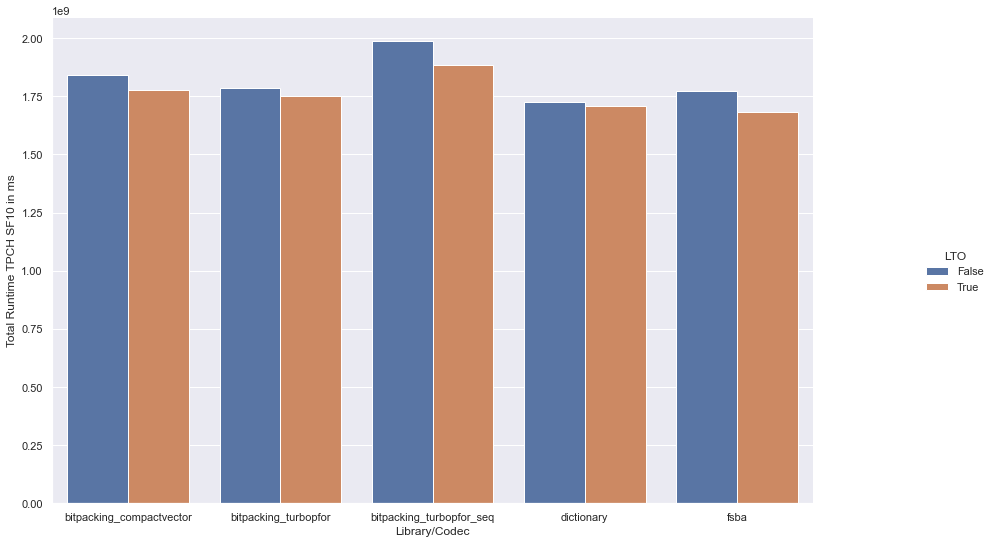

In [31]:
   
# https://stackoverflow.com/questions/28904397/how-to-set-the-value-of-the-axis-multiplier-in-matplotlib
class MagnitudeFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
plot = sns.catplot(data=high_level, x="fancy_name", y="total_runtime", kind="bar", hue="LTO")
plot.set_axis_labels("Library/Codec", "Total Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(15,8)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

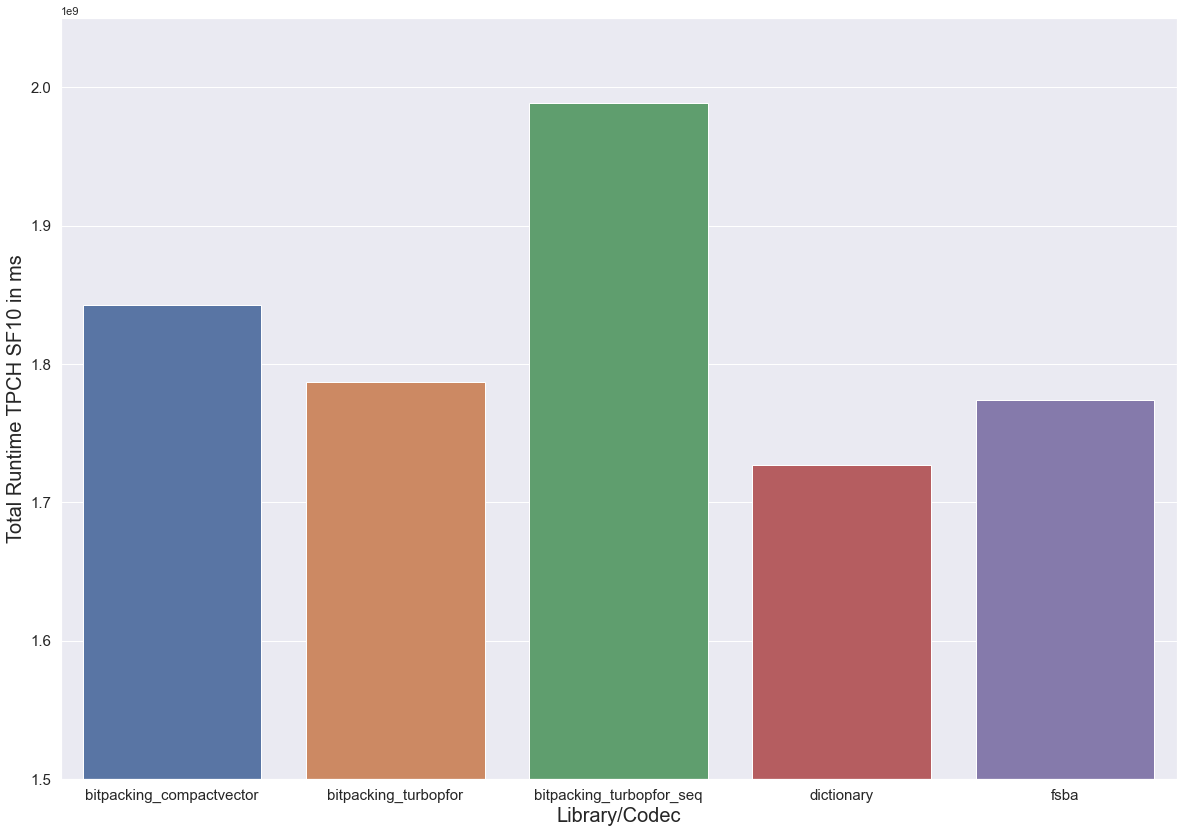

In [30]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level[~high_level["benchmark_run_name"].str.match(".*LTO.*")],
    "tpch_compression_high_level_without_lto")